## **Indian Startup Funding** Analysis using (Pandas)

INTRODUCTION

Overview
This dataset provides a comprehensive view of funding activities within the Indian startup ecosystem between 2016 and 2020. It highlights the dynamic growth and the significant investment trends that have shaped India's entrepreneurial landscape during these years.
The dataset has been sourced from Kaggle.
The dataset captures key details about startups, including their funding amount, industries, investors, and locations. It is an essential resource of understanding how different sectors, geographies, and  funding types influence startup success in India.

1.	  Sr No: Unique identifier for each entry.
2.	  Date: The date when the funding round occurred.
3.	  Startup Name: Name of the funded startup.
4.	  Industry Vertical: Sector or domain in which the startup operates.
5.	  SubVertical: Subsector specialization.
6.	  City Location: Primary city where the startup operates.
7.	  Investors Name: Names of the investors who participated in the funding round.
8.	  Investment Type: Type of investment (e.g., Seed Funding, Series A).
9.	  Amount in USD: The amount of funding received, in USD.
10.	  Remarks: Additional notes or details about the funding round.




In [13]:
import pandas as pd
import numpy as np

**Data collection: I collected this dataset from kaggle.**

In [14]:
df=pd.read_csv("startup_funding.csv")

**Understanding the data.**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [16]:
df.describe(include="all") # before data cleaning there is only one numerical column.


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044.000000,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,NaN,1035,2459,821,1942,112,2412,55,471,72
top,NaN,02-02-2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,NaN,11,8,941,11,700,39,1356,165,175
mean,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,878.871435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,761.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1522.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2283.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [18]:
df.columns
# column names:- Sr No, Date, Startup Name, Industry Vertical, SubVertical, City Location Investors Name, INvestmentntype, Amount in USD, Remarks

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [19]:
df.dtypes # There are a total of 9 object columns and 1 numeric column before data cleaning and feature engineering.

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [20]:
df.shape
rows=df.shape[0]
columns=df.shape[1]
print(f"Rows:-{rows} in total and Columns:-{columns} in total")

Rows:-3044 in total and Columns:-10 in total


**Data cleaning.**


In [21]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [22]:
df.drop(columns=['Sr No','Remarks'],inplace=True) # dropping unnecessary columns

In [23]:
# Renaming column names
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'startups',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'location',
    'Investors Name':'investor',
    'Amount in USD':'amount',
    'InvestmentnType':'investment round'
},inplace=True)

In [24]:
df.columns

Index(['Date', 'startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount'],
      dtype='object')

In [25]:
df.isna().sum()# There is a total of 7 columns having null values.

Date                  0
startups              0
vertical            171
subvertical         936
location            180
investor             24
investment round      4
amount              960
dtype: int64

In [26]:
df.duplicated().sum() # checkinng duplicate values

np.int64(0)

In [27]:
df["amount"]=df["amount"].fillna("0")# filling null values to 0



In [28]:
df["amount"].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [29]:
df['amount']=df['amount'].str.replace(',','')
df['amount']=df['amount'].str.replace('undisclosed','0')
df['amount']=df['amount'].str.replace('unknown','0')
df['amount']=df['amount'].str.replace('Undisclosed','0')

In [30]:
df=df[df['amount'].str.isdigit()]

In [31]:
df["amount"]=df['amount'].astype("float") # Changed the data type of "amount" column to float.

In [32]:
df.dtypes

Date                 object
startups             object
vertical             object
subvertical          object
location             object
investor             object
investment round     object
amount              float64
dtype: object

In [33]:
df["amount"]

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            0.0
3043       140000.0
Name: amount, Length: 3029, dtype: float64

In [34]:
df["Date"].unique()

array(['09-01-2020', '13-01-2020', '02-01-2020', ..., '29-01-2015',
       '30-01-2015', '31-01-2015'], dtype=object)

In [35]:
df['Date']=df['Date'].str.replace('05/072018','05/07/2018')
df['Date']=df['Date'].str.replace('15-01-07 00:00:00','15/01/07')

In [36]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [37]:
# Rows with NaN value are dropped because too many rows provide irrelevant information.
df.dropna(subset=['Date','location','subvertical',
                  'vertical','investor',
                  'investment round'],inplace=True)



In [38]:
df.isna().sum()

Date                0
startups            0
vertical            0
subvertical         0
location            0
investor            0
investment round    0
amount              0
dtype: int64

In [39]:
df # After dropping unnecessary columns and removing all NaN values, this dataset now has 890 rows and 8 columns.

,Date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
...,...,...,...,...,...,...,...,...
2035,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0
2036,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0
2037,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0
2038,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0


In [40]:
df.reset_index(drop=True,inplace=True)

# **Analysis**

**1.Top 10 fund raised companies.**

In [41]:
funds_overview=df.groupby("startups")["amount"].sum()
funds_overview=funds_overview[funds_overview>0]

In [42]:
funds_overview

startups
"BYJU\\'S"    150000000.0
19th mile        180000.0
360Ride          150000.0
3HCare           100000.0
3rdFlix         5000000.0
                 ...     
imedilane         40000.0
medECUBE        4000000.0
quizizz         3000000.0
wayForward      1000000.0
zippserv         440000.0
Name: amount, Length: 566, dtype: float64

In [43]:

top10_companies=funds_overview.sort_values(ascending=False).head(10)
top10_companies=pd.DataFrame(top10_companies)
top10_companies=top10_companies.reset_index()
top10_companies


,startups,amount
0,Flipkart,2.500000e+09
1,Udaan,8.100000e+08
2,GOQii,4.500000e+08
3,Ola,4.345000e+08
4,Zomato,3.500000e+08
5,BigBasket,3.000000e+08
6,OYO Rooms,2.500000e+08
7,Zilingo,2.340000e+08
8,CarDekho,2.000000e+08
9,Paytm Marketplace,2.000000e+08


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.Top 10 E-commerce companies**

In [45]:
df['vertical'].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'E-Commerce', 'Aerospace', 'Gaming',
       'Video Games', 'Last Mile Transportation', 'Customer Service',
       'B2B', 'Advertising, Marketing', 'SaaS', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'Finance', 'Compliance',
       'Transport', 'Artificial Intelligence', 'Food and Beverage',
       'EdTech', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Energy', 'Digital Media',
       'Transportation', 'Services', 'Saas', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, Ecommerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-

In [46]:
df['vertical']=df['vertical'].str.replace('E-Commerce','E-commerce')
df['vertical']=df['vertical'].str.replace('Ecommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('ECommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommerce','E-commerce')
df['vertical']=df['vertical'].str.replace('eCommece','E-commerce')

In [47]:
E_commerce=df[df["vertical"]=="E-commerce"][["startups","amount"]]
E_commerce=E_commerce[E_commerce["amount"]>0]
top10_E_commerce_company=E_commerce.sort_values(by="amount",ascending=False).head(10)

In [48]:
top10_E_commerce_company=top10_E_commerce_company.groupby("startups")["amount"].sum()

In [49]:
top10_E_commerce_company=pd.DataFrame(top10_E_commerce_company).sort_values(by="amount",ascending=False).head(10).reset_index()

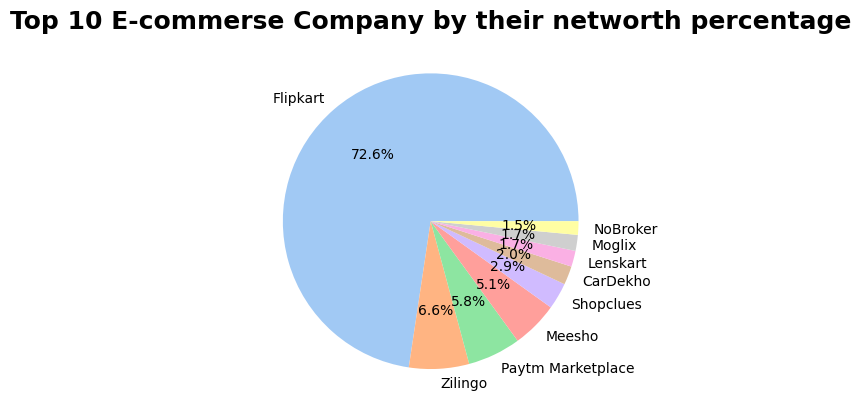

In [50]:
# plt.figure(figsize=())
plt.pie(top10_E_commerce_company['amount'], labels=top10_E_commerce_company['startups'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Top 10 E-commerse Company by their networth percentage', fontsize=18, weight='bold')
plt.show()

With 72.6 percent, Flipkart is at the first position, Zilingo at the second position and Paytm at the third position.

**3.Top 5 startup friendly locations in India.**

In [51]:
df["location"].unique()


array(['Bengaluru', 'New Delhi', 'Mumbai', 'Gurgaon', 'Pune', 'Noida',
       'Amritsar', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Singapore',
       'Kormangala', 'Taramani', 'Andheri', 'Chembur', 'Haryana',
       'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Delhi', 'Bhopal',
       'Gurugram', 'India/Singapore', 'Jaipur', 'India/US', 'Chennai',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Rourkela', 'Srinagar',
       'Bhubneswar', 'Coimbatore', 'Bangalore', 'Faridabad', 'Ahemdabad',
       'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa', 'Nw Delhi', 'Kolkata',
       'Trivandrum', 'Vadodara', 'Panaji', 'Udupi', 'Kochi',
       'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'US', 'Chandigarh',
       'Siliguri', 'Lucknow', 'Kanpur', 'SFO / Bangalore', 'London',
       'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi'], dtype=object)

In [52]:
df['location']=df['location'].str.replace('Bengaluru','Bangalore')
df['location']=df['location'].str.replace('Bengaluru and Gurugram','Bangalore')
df['location']=df['location'].str.replace('New York, Bengaluru','Bangalore')
df['location']=df['location'].str.replace('Bangalore/ Bangkok','Bangalore')
df['location']=df['location'].str.replace('SFO / Bangalore','Bangalore')
df['location']=df['location'].str.replace('Seattle / Bangalore','Bangalore')
df['location']=df['location'].str.replace('Bangalore / SFO','Bangalore')
df['location']=df['location'].str.replace('Mumbai/Bengaluru','Mumbai')
df['location']=df['location'].str.replace('Mumbai / UK','Mumbai')
df['location']=df['location'].str.replace('New Delhi / US','New Delhi')
df['location']=df['location'].str.replace('Pune / Dubai','Pune')
df['location']=df['location'].str.replace('Pune/Seattle','Pune')

In [53]:
top_investment = df['investment round'].value_counts().head(10)
top_investment

investment round
Private Equity          388
Seed Funding            362
Seed/ Angel Funding      23
Series A                 16
Seed / Angel Funding     15
Debt Funding             13
Series D                 10
Series B                  8
Series C                  8
Seed/Angel Funding        7
Name: count, dtype: int64

In [54]:
top5_loc=df["location"].value_counts().head(5)

In [55]:
top5_loc

location
Bangalore    259
Mumbai       171
New Delhi    119
Gurgaon       85
Pune          42
Name: count, dtype: int64

C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_15952\4213459012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5_loc,x=top5_loc.index,palette=


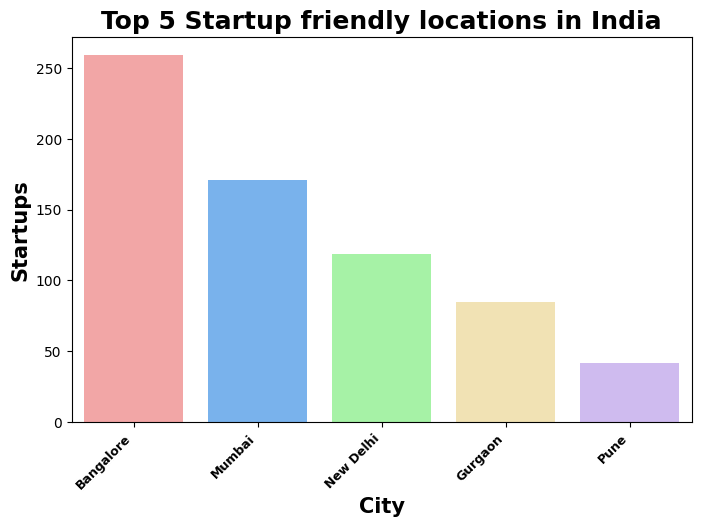

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(y=top5_loc,x=top5_loc.index,palette=
            ['#FF9999', '#66B2FF', '#99FF99','#fbe7aa','#cdb2f8'])
plt.title('Top 5 Startup friendly locations in India',fontsize=18,weight='bold')
plt.xlabel('City',fontsize=15,weight='bold')
plt.ylabel('Startups',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')

plt.show()

As per above analysis Bangalore is more suitable for startup in India.

Largest tech hub with the most startups and tech talent.

High funding availability from investors and venture capitalists.

Thriving ecosystem with incubators, accelerators, and government support.

Sectors :

> Technology

> SaaS (Software as a Service)

> E-commerce

> FinTech

***4.Top*** **5 startup investors in India.**

In [57]:
df['investor']=df['investor'].str.replace('Undisclosed investor','Undisclosed Investors')
df['investor']=df['investor'].str.replace('Undisclosed','Undisclosed Investors')
df['investor']=df['investor'].str.replace('Undisclosed Investor','Undisclosed Investors')

In [58]:
top5_investors=df.groupby("investor")["amount"].sum().reset_index().sort_values(by="amount",ascending=False).head(5)

In [59]:
top5_investors

,investor,amount
623,Softbank,2.500000e+09
45,"Altimeter Capital, DST Global",5.850000e+08
104,Bennett Coleman and Company Ltd (BCCL),4.500000e+08
621,SoftBank Group Corp,3.300000e+08
40,"Alibaba, Helion Venture Partners, Bessemer Ven...",3.000000e+08


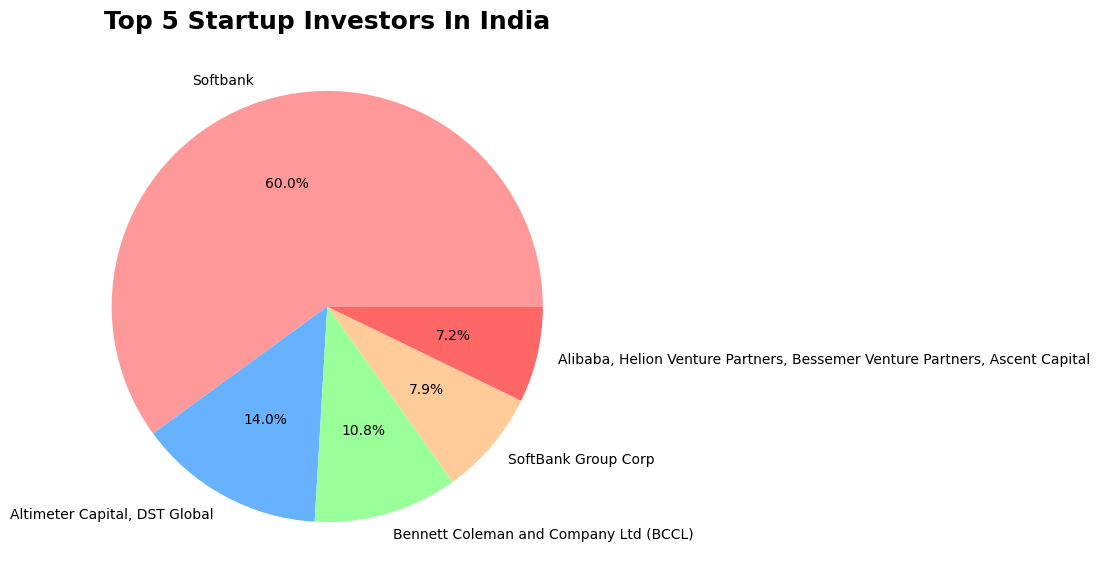

In [60]:
plt.figure(figsize=(7,7))
plt.pie(top5_investors['amount'], labels=top5_investors['investor'], autopct='%1.1f%%',
        colors= ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'])
plt.title('Top 5 Startup Investors In India', fontsize=18, weight='bold')
plt.show()

**5.Flipkart's investors**

In [61]:
flipkart=df[df["startups"]=="Flipkart"][["investor","amount"]]
flipkart
# soft bank group is the only investor of flipkart. (2.5 billion dollers)

,investor,amount
308,Softbank,2.500000e+09


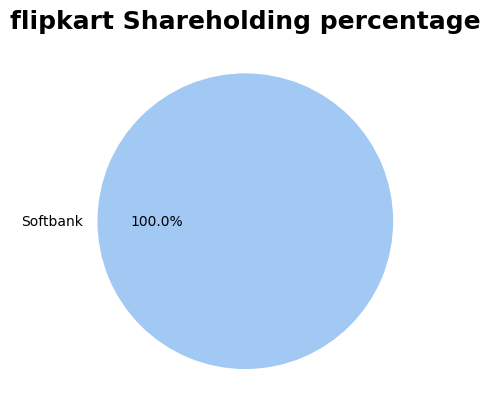

In [62]:

plt.pie(flipkart['amount'], labels=flipkart['investor'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('flipkart Shareholding percentage', fontsize=18, weight='bold')
plt.show()

**6.Paytm share holding groups**

In [63]:
Paytm=df[df["startups"]=="Paytm Marketplace"][["investor","amount"]]
Paytm
# Alibaba group is the only share holder of paytm

,investor,amount
437,Alibaba,200000000.0


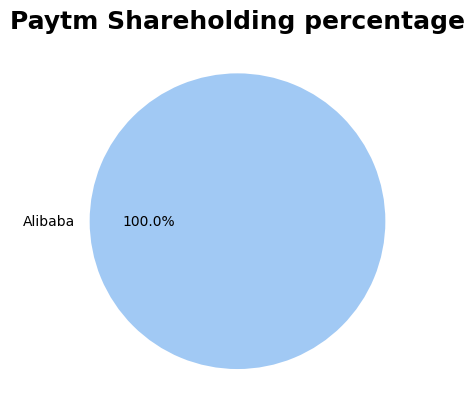

In [64]:

plt.pie(Paytm['amount'], labels=Paytm['investor'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Paytm Shareholding percentage', fontsize=18, weight='bold')
plt.show()

**7.Healthcare marketcap acquisition by startups.**

In [65]:
df["vertical"].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'Aerospace', 'Gaming', 'Video Games',
       'Last Mile Transportation', 'Customer Service', 'B2B',
       'Advertising, Marketing', 'SaaS', 'IoT', 'Information Technology',
       'Consumer Technology', 'Health and Wellness', 'Accounting',
       'Finance', 'Compliance', 'Transport', 'Artificial Intelligence',
       'Food and Beverage', 'EdTech', 'Tech', 'Health Care',
       'Luxury Label', 'Waste Management Service', 'Deep-Tech', 'Energy',
       'Digital Media', 'Transportation', 'Services', 'Saas', 'Fintech',
       'Edtech', 'AI', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, E-commerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-Tech',
       'IT', 'Fiinance', '

In [66]:
df['vertical']=df['vertical'].str.replace('Health and wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Health and Wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Healthcare','healthcare')
df['vertical']=df['vertical'].str.replace('Health Care','healthcare')

In [67]:
Healthcare=df[df["vertical"] == "healthcare"][['startups',"amount"]]
Healthcare=Healthcare[Healthcare['amount'] > 0]
top10_Healthcare_company=Healthcare.sort_values(by="amount",ascending=False).head(10)

In [68]:
top10_Healthcare_company

,startups,amount
20,GOQii,450000000.0
180,Shape,100000000.0
392,Healthcare at Home,40000000.0
68,Vyome Therapeutics Inc.,22000000.0
175,Asia Institute Of Medical Science,21000000.0
404,Medwell Ventures,21000000.0
438,iGenetics,19500000.0
182,healthifyme,12000000.0
163,MedGenome,10000000.0
273,OncoStem,6000000.0


C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_15952\2062813723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_Healthcare_company['amount'],x=top10_Healthcare_company['startups'],palette=
C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_15952\2062813723.py:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=top10_Healthcare_company['amount'],x=top10_Healthcare_company['startups'],palette=


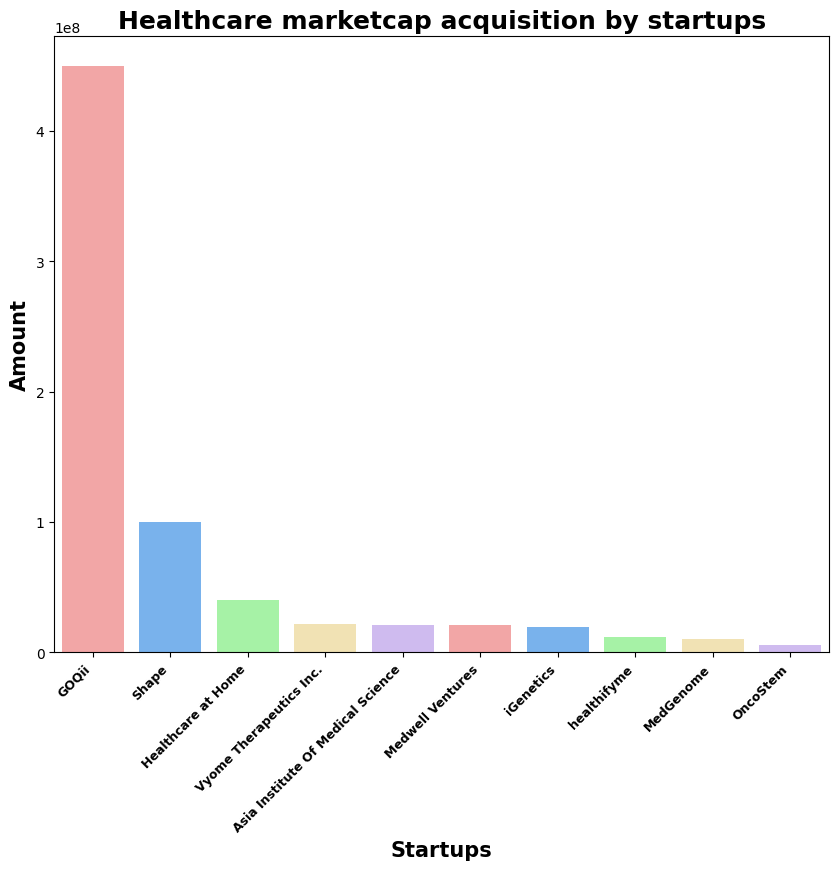

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(y=top10_Healthcare_company['amount'],x=top10_Healthcare_company['startups'],palette=
            ['#FF9999', '#66B2FF', '#99FF99','#fbe7aa','#cdb2f8'])
plt.title('Healthcare marketcap acquisition by startups',fontsize=18,weight='bold')
plt.xlabel('Startups',fontsize=15,weight='bold')
plt.ylabel('Amount',fontsize=15,weight='bold')
plt.xticks(rotation=45,ha='right',fontsize=9,weight='bold')

plt.show()

**8.Top 5 markets most liked by investors.**

In [71]:
investors_interest=df.groupby("vertical")["startups"].size().reset_index(name="number_of_startups").sort_values(by="number_of_startups",ascending=False).head(5)

In [72]:
investors_interest

,vertical,number_of_startups
10,Consumer Internet,364
58,Technology,198
16,E-commerce,131
65,healthcare,36
28,Finance,26


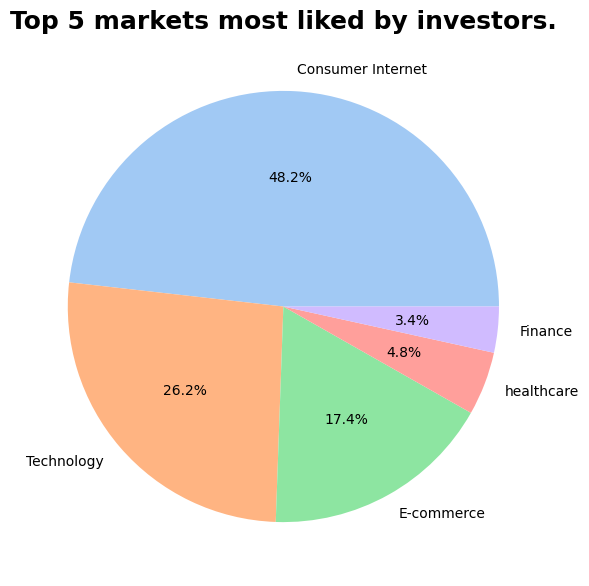

In [73]:
plt.figure(figsize=(7,7))
plt.pie(investors_interest['number_of_startups'], labels=investors_interest['vertical'], autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title('Top 5 markets most liked by investors.', fontsize=18, weight='bold')
plt.show()

**9.Total funding amount over the years**

In [74]:
# Extract year and month for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_15952\3446486547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_per_year.index, y=funding_per_year.values, palette='pastel')


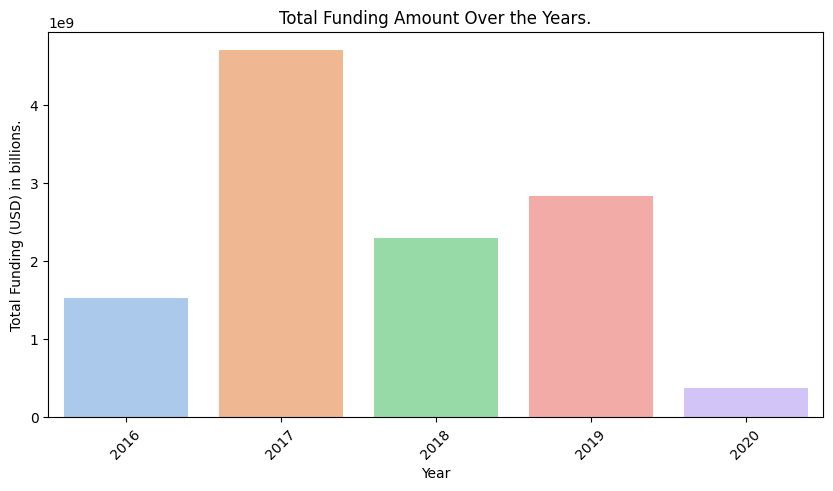

In [75]:
funding_per_year = df.groupby('Year')['amount'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=funding_per_year.index, y=funding_per_year.values, palette='pastel')
plt.title('Total Funding Amount Over the Years.')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD) in billions.')
plt.xticks(rotation=45)
plt.show()

As per time based analysis, highest funding is on 2017 and lowest is on 2020.

**10.Top 10 funding sectors**

C:\Users\Vishnu Gopan\AppData\Local\Temp\ipykernel_15952\4072649832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='pastel')


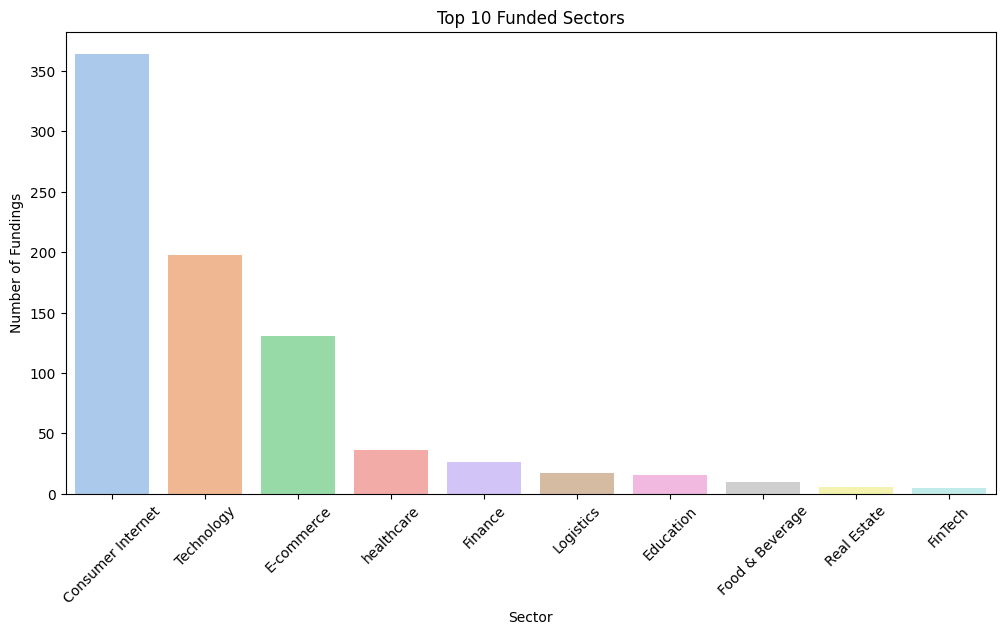

In [76]:
# Most funded sectors
top_sectors = df['vertical'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='pastel')
plt.title('Top 10 Funded Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Fundings')
plt.xticks(rotation=45)
plt.show()


As per this barplot analysis (internet consumer) is at the top and (Fin Tech) is on the bottom.

**CONCLUSION**

In this project, I utilized the Pandas library to efficiently process and analyze the dataset. By cleaning, transforming, and visualizing the data, I was able to uncover valuable insights. Key steps included handling missing data, performing aggregations, and generating descriptive statistics that highlighted patterns and trends within the dataset.
+
Key findings

> As per my analysis when it's comes to startups Flipkart is the top growing company and it's 100% share holder is "soft bank" group. And flipkart is an E-commerce Sector platform.

> Most funded sector is "Consumer Internet", and there is a total of 364 startups invested in this sector eg:-(Netmeds, Daily hunt, HappyGoEasy, Nykaa, etc....)

> Highest funding is on 2017 and lowest is on 2020.

Based on this analysis I found that Investing in the e-commerce sector can be an attractive option for those looking to tap into the growing trend of online shopping. The sector has been experiencing rapid growth for several years, and this trend is expected to continue as consumer behavior shifts towards digital platforms.

Overall, this project highlights the effectiveness of Pandas for data cleaning, manipulation, and analysis, and provides a solid foundation for more complex analytical tasks.